<a href="https://colab.research.google.com/github/ziadelsharawy/Test/blob/main/Credit_Card_Dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [ ]:
df=pd.read_csv('/content/creditcard_2023.csv')
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0.0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0.0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0.0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0.0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0.0


In [ ]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,11046.000000,11046.000000,11046.000000,11046.000000,11046.000000,11046.000000,11046.000000,11046.000000,11046.000000,11046.000000,...,11045.000000,11045.000000,11045.000000,11045.000000,11045.000000,11045.000000,11045.000000,11045.000000,11045.000000,11045.000000
mean,5522.500000,0.289275,-0.379306,1.160554,-0.599833,0.296414,0.520460,0.445591,-0.156259,1.183819,...,-0.134332,-0.164478,-0.047329,0.162997,0.082168,0.107517,-0.202903,-0.096002,11964.237262,0.004346
std,3188.849871,0.603648,0.510983,0.718361,0.677674,0.648659,0.715619,0.500479,0.238518,0.918706,...,0.336047,0.564038,0.508838,1.103136,0.698946,1.227351,0.468592,0.641231,6942.553895,0.065783
min,0.000000,-2.513872,-20.936274,-1.887163,-3.996094,-4.298320,-18.642598,-3.038728,-4.074350,-2.170915,...,-5.775451,-6.238628,-14.452018,-3.674306,-6.810179,-3.733169,-5.273815,-8.758956,50.530000,0.000000
25%,2761.250000,-0.164938,-0.520236,0.696355,-0.937550,0.024293,0.106534,0.261070,-0.194486,0.581370,...,-0.214004,-0.535417,-0.198065,-0.561456,-0.332053,-0.815035,-0.330536,-0.137825,5964.330000,0.000000
50%,5522.500000,0.046835,-0.348873,1.052061,-0.515545,0.192501,0.394994,0.409261,-0.148963,1.086558,...,-0.154735,-0.167011,-0.069592,0.182683,0.126616,0.087327,-0.241289,-0.060290,11792.450000,0.000000
75%,8283.750000,0.949536,-0.157170,1.588649,-0.156584,0.407306,0.767068,0.605656,-0.088451,1.641623,...,-0.091719,0.186651,0.060336,0.863834,0.518403,0.971485,-0.102454,0.085144,18013.950000,0.000000
max,11045.000000,1.695400,1.828794,4.440555,2.240182,41.540257,9.295606,37.922674,1.315378,12.171681,...,6.830180,4.929620,18.418155,8.395836,10.424231,5.623285,17.987212,11.375357,24035.200000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11046 entries, 0 to 11045
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11046 non-null  int64  
 1   V1      11046 non-null  float64
 2   V2      11046 non-null  float64
 3   V3      11046 non-null  float64
 4   V4      11046 non-null  float64
 5   V5      11046 non-null  float64
 6   V6      11046 non-null  float64
 7   V7      11046 non-null  float64
 8   V8      11046 non-null  float64
 9   V9      11046 non-null  float64
 10  V10     11046 non-null  float64
 11  V11     11046 non-null  float64
 12  V12     11046 non-null  float64
 13  V13     11046 non-null  float64
 14  V14     11046 non-null  float64
 15  V15     11046 non-null  float64
 16  V16     11046 non-null  float64
 17  V17     11046 non-null  float64
 18  V18     11046 non-null  float64
 19  V19     11046 non-null  float64
 20  V20     11045 non-null  float64
 21  V21     11045 non-null  float64
 22

In [ ]:
df.isna().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.drop(['id'], axis=1, inplace=True)

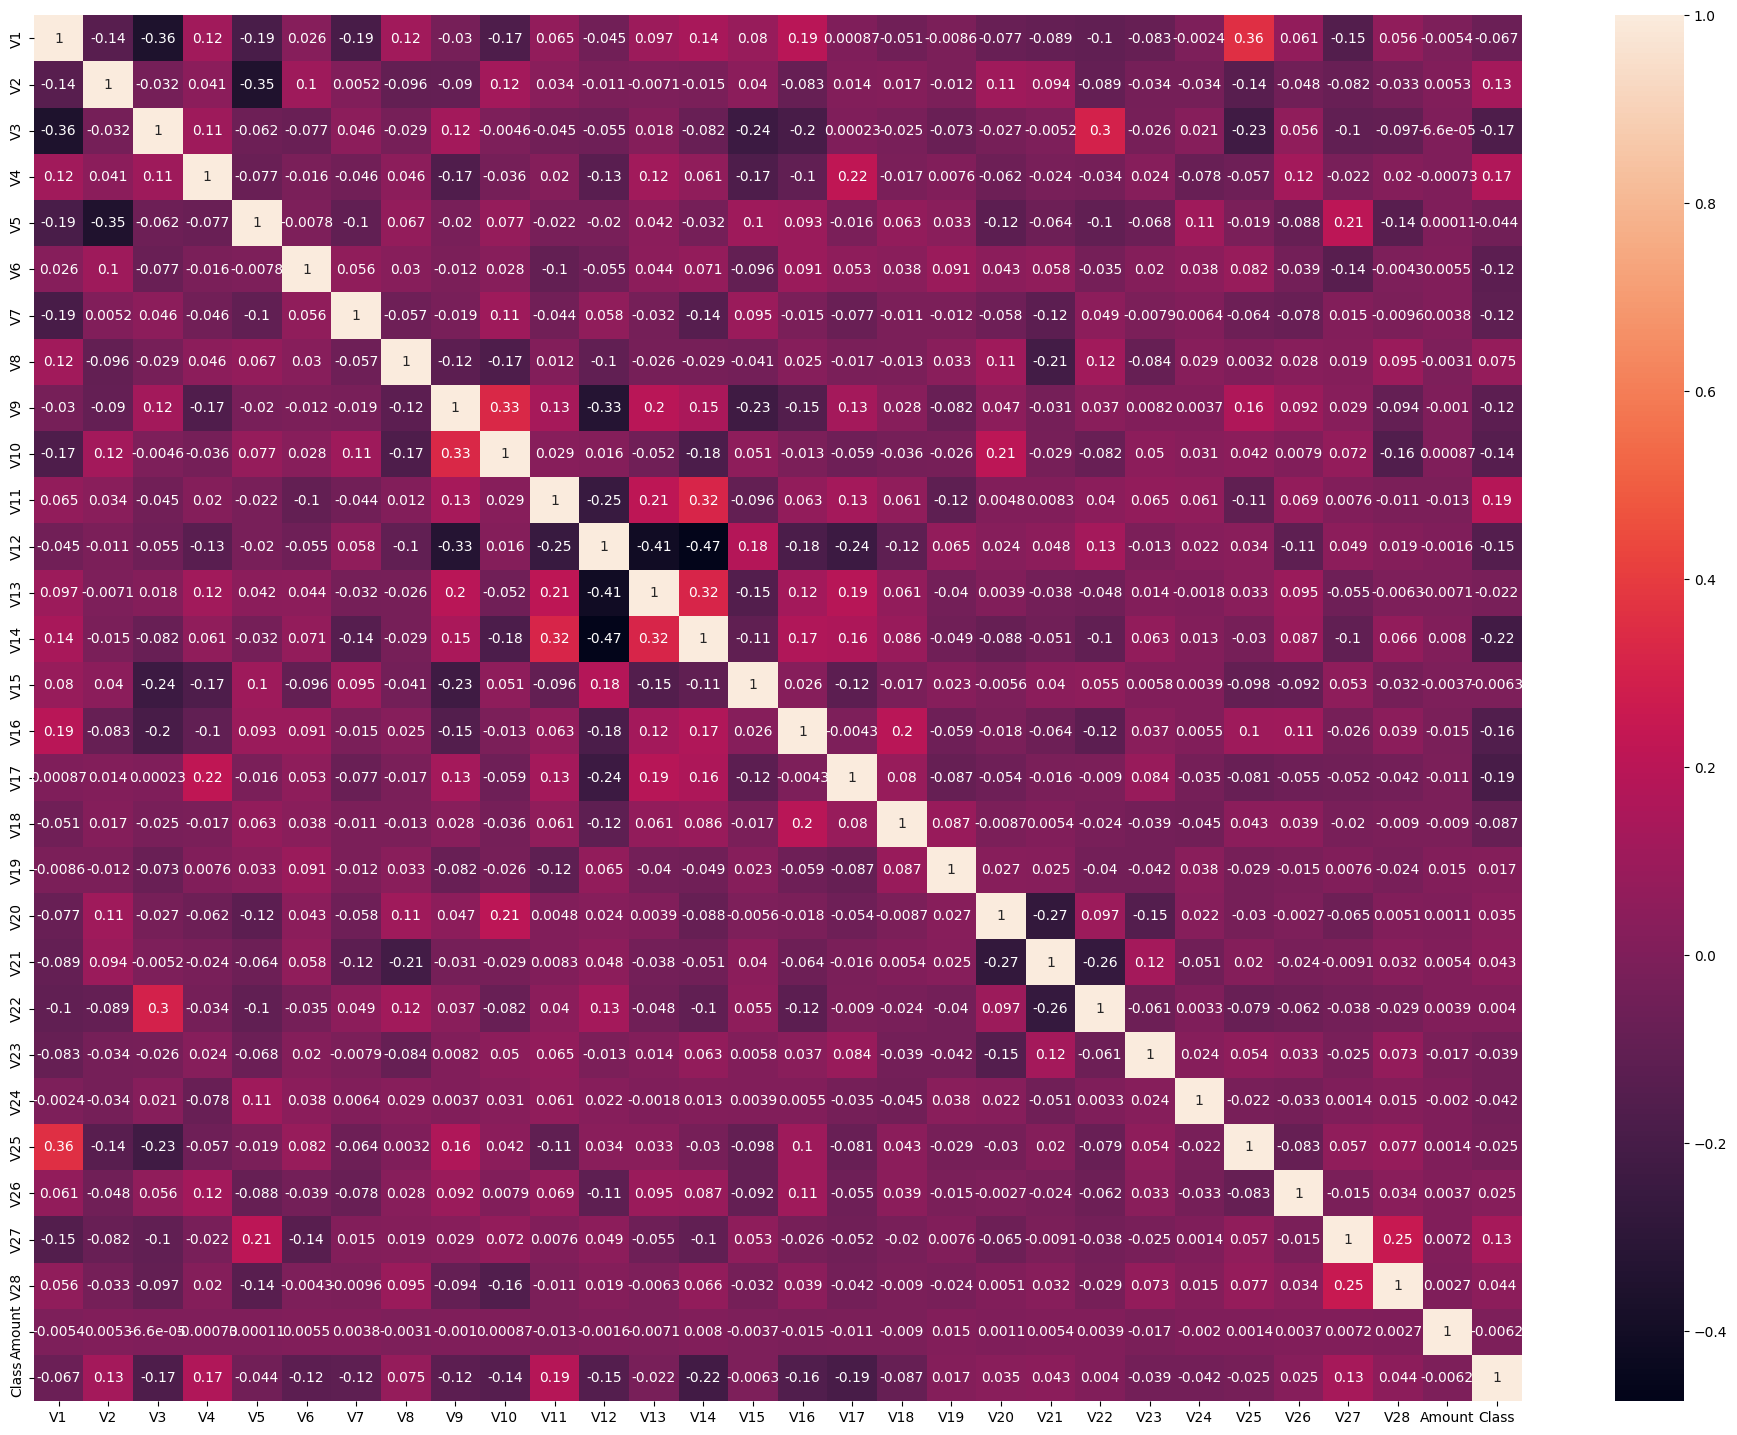

In [ ]:
plt.figure(figsize=(24,18))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [ ]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

In [ ]:
best_score = -1
best_k = 0

for k in range(3,5):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(reduced_data)
    score = silhouette_score(reduced_data, labels)
    print(f'Number of clusters: {k}, Silhouette Score: {score}')
    if score > best_score:
        best_score = score
        best_k = k
print(f'Best number of clusters: {best_k}, Best Silhouette Score: {best_score}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 3, Silhouette Score: 0.5173977810557497


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 4, Silhouette Score: 0.4998766543610267
Best number of clusters: 3, Best Silhouette Score: 0.5173977810557497


In [ ]:
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels = kmeans.fit_predict(reduced_data)
kmeans_silhouette = silhouette_score(reduced_data, kmeans_labels)
print(f'K-means without PCA Silhouette Score: {kmeans_silhouette}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-means without PCA Silhouette Score: 0.5173977810557497


<ipython-input-16-0128ded31f3b>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_labels))


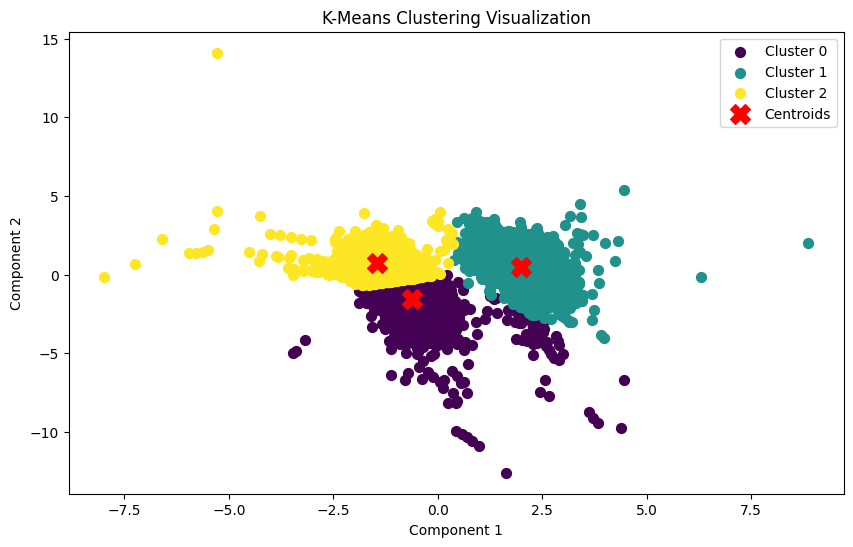

In [ ]:
# Plotting the clusters
plt.figure(figsize=(10, 6))
unique_labels = np.unique(kmeans_labels)
colors = plt.cm.get_cmap('viridis', len(unique_labels))

for i, label in enumerate(unique_labels):
    cluster_data = reduced_data[kmeans_labels == label]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], s=50, color=colors(i), label=f'Cluster {label}')

# Plotting the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.title('K-Means Clustering Visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

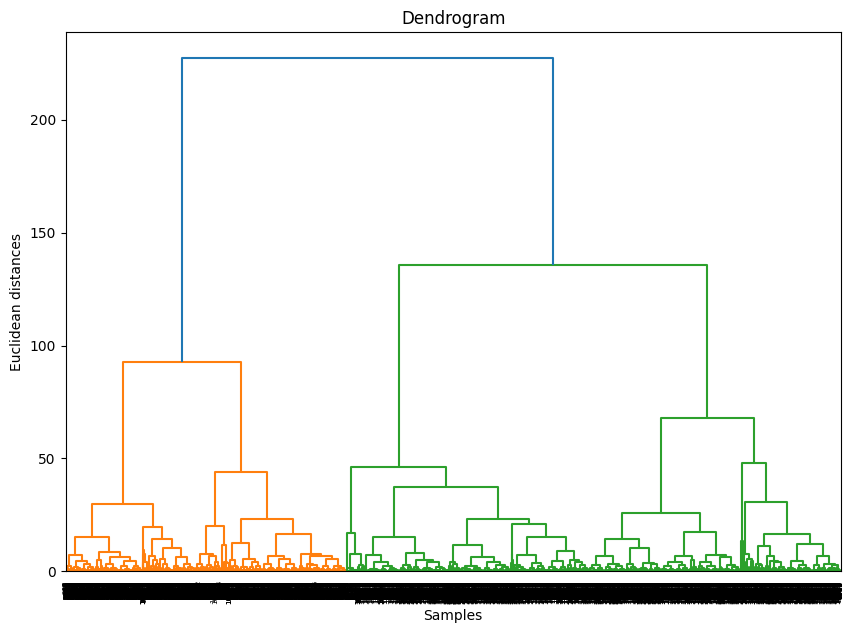

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
linked = linkage(reduced_data, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hc_labels = hc.fit_predict(reduced_data)

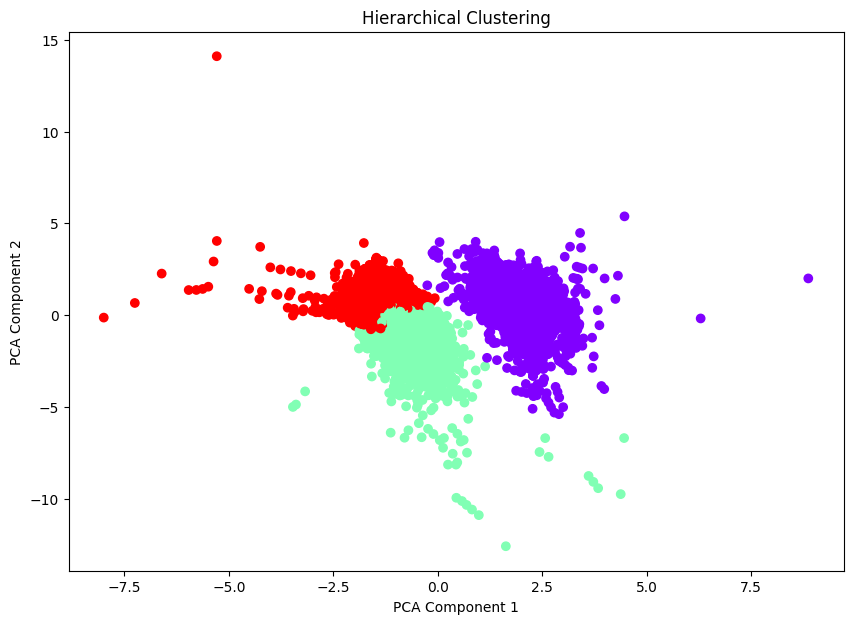

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=hc_labels, cmap='rainbow')
plt.title('Hierarchical Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(reduced_data)

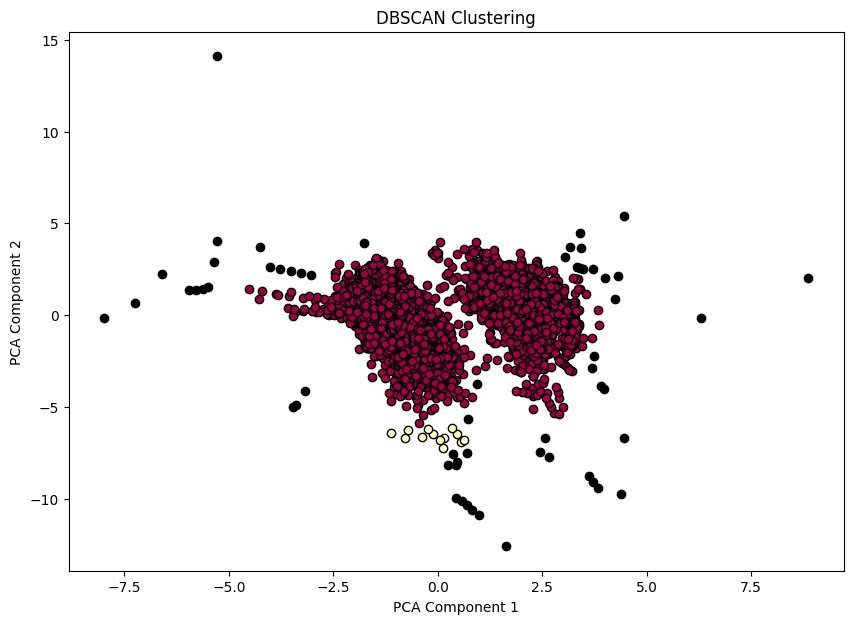

In [ ]:
plt.figure(figsize=(10, 7))
unique_labels = set(dbscan_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = (dbscan_labels == k)
    xy = reduced_data[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [ ]:
kmeans_silhouette = silhouette_score(reduced_data, kmeans_labels)
print(f'K-means Silhouette Score: {kmeans_silhouette}')

hc_silhouette = silhouette_score(reduced_data, hc_labels)
print(f'Hierarchical Clustering Silhouette Score: {hc_silhouette}')

if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(reduced_data, dbscan_labels)
    print(f'DBSCAN Silhouette Score: {dbscan_silhouette}')
else:
    print('DBSCAN did not find more than one cluster.')


K-means Silhouette Score: 0.5173977810557497
Hierarchical Clustering Silhouette Score: 0.48146912353425436
DBSCAN Silhouette Score: 0.576786417548313


In [ ]:
best_eps = 0
best_min_samples = 0
best_score = -1

eps_values = np.arange(0.1, 2.0, 0.1)
min_samples_values = range(2, 10)

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(reduced_data)
        if len(set(labels)) > 1:
            score = silhouette_score(reduced_data, labels)
            print(f'eps: {eps}, min_samples: {min_samples}, Silhouette Score: {score}')
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f'Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best Silhouette Score: {best_score}')


eps: 0.1, min_samples: 2, Silhouette Score: -0.5157189259951338
eps: 0.1, min_samples: 3, Silhouette Score: -0.4573837533566885
eps: 0.1, min_samples: 4, Silhouette Score: -0.3617061792638469
eps: 0.1, min_samples: 5, Silhouette Score: -0.22196554770962246
eps: 0.1, min_samples: 6, Silhouette Score: -0.2712755442912497
eps: 0.1, min_samples: 7, Silhouette Score: -0.15808187984996017
eps: 0.1, min_samples: 8, Silhouette Score: -0.2715896332532981
eps: 0.1, min_samples: 9, Silhouette Score: -0.3470195440986552
eps: 0.2, min_samples: 2, Silhouette Score: -0.1494004509751638
eps: 0.2, min_samples: 3, Silhouette Score: 0.20675970628622958
eps: 0.2, min_samples: 4, Silhouette Score: 0.28034289307235954
eps: 0.2, min_samples: 5, Silhouette Score: 0.2476589500858722
eps: 0.2, min_samples: 6, Silhouette Score: 0.2627712362517002
eps: 0.2, min_samples: 7, Silhouette Score: 0.16777935803039903
eps: 0.2, min_samples: 8, Silhouette Score: 0.10056484611347491
eps: 0.2, min_samples: 9, Silhouette Sco

In [ ]:
best_score = -1
best_k = 0

for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(reduced_data)
    score = silhouette_score(reduced_data, labels)
    print(f'Number of clusters: {k}, Silhouette Score: {score}')
    if score > best_score:
        best_score = score
        best_k = k

print(f'Best number of clusters: {best_k}, Best Silhouette Score: {best_score}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 2, Silhouette Score: 0.5341236208278657


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 3, Silhouette Score: 0.5173977810557497


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 4, Silhouette Score: 0.4998766543610267


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 5, Silhouette Score: 0.4817702984358867


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 6, Silhouette Score: 0.4461766283505041


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 7, Silhouette Score: 0.43127605217406323


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 8, Silhouette Score: 0.4066111963649155


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 9, Silhouette Score: 0.39296846423640386


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 10, Silhouette Score: 0.37287464831580824


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 11, Silhouette Score: 0.3549026924147424


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 12, Silhouette Score: 0.3570997021601434


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 13, Silhouette Score: 0.34323137125801817


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 14, Silhouette Score: 0.34304735705927153


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 15, Silhouette Score: 0.3490725622512287


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 16, Silhouette Score: 0.35448911367485086


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 17, Silhouette Score: 0.35657624201907195


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 18, Silhouette Score: 0.361316356697374


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 19, Silhouette Score: 0.35956933918300943


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 20, Silhouette Score: 0.35874941922912523
Best number of clusters: 2, Best Silhouette Score: 0.5341236208278657


In [ ]:
linkages = ['ward', 'complete', 'average', 'single']
best_score = -1
best_linkage = ""

for linkage in linkages:
    hc = AgglomerativeClustering(n_clusters=best_k, affinity='euclidean', linkage=linkage)
    labels = hc.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    print(f'Linkage: {linkage}, Silhouette Score: {score}')
    if score > best_score:
        best_score = score
        best_linkage = linkage

print(f'Best linkage: {best_linkage}, Best Silhouette Score: {best_score}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Linkage: ward, Silhouette Score: 0.07660176901287839


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Linkage: complete, Silhouette Score: 0.9292385385737802


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Linkage: average, Silhouette Score: 0.9292385385737802


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Linkage: single, Silhouette Score: 0.9292385385737802
Best linkage: complete, Best Silhouette Score: 0.9292385385737802
